# 0.0 IMPORTS

In [ ]:
import pandas            as pd
import numpy             as np

import matplotlib.pyplot as plt
import seaborn           as sns

from sklearn.model_selection import train_test_split
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble        import RandomForestClassifier

## 0.1 HELPER FUNCTIONS

## 0.2 LOAD DATASET

In [4]:
df_raw_loans = pd.read_csv('../dataset/loan_data.csv')

# 1.0 DATA DESCRIPTION

In [5]:
df1 = df_raw_loans.copy()

## 1.1 RENAME COLUMNS

In [9]:
cols_old = ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
            'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
            'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']

cols_new = ['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
            'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
            'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid']

rename_dict = dict(zip(cols_old, cols_new))

df1.rename(columns=rename_dict, inplace=True)

df1.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## 1.2 DATA DIMENSION

In [10]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 9578
Number of columns: 14


## 1.3 DATA TYPES

In [11]:
df1.dtypes

credit_policy          int64
purpose               object
int_rate             float64
installment          float64
log_annual_inc       float64
dti                  float64
fico                   int64
days_with_cr_line    float64
revol_bal              int64
revol_util           float64
inq_last_6mths         int64
delinq_2yrs            int64
pub_rec                int64
not_fully_paid         int64
dtype: object

## 1.4 CHECK NA's

In [12]:
df1.isna().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

## 1.5 DESCRIPTIVE STATISTICAL

In [13]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'datetime'])

### 1.5.1 NUMERICAL ATTRIBUTES

In [14]:
# Central Tendences - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersions - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# Concatenate
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

# Name Columns
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,credit_policy,0.000000,1.000000e+00,1.000000e+00,0.804970,1.000000,0.396224,-1.539621,0.370512
1,int_rate,0.060000,2.164000e-01,1.564000e-01,0.122640,0.122100,0.026846,0.164420,-0.224324
2,installment,15.670000,9.401400e+02,9.244700e+02,319.089413,268.950000,207.060491,0.912522,0.137908
3,log_annual_inc,7.547502,1.452835e+01,6.980853e+00,10.932117,10.928884,0.614781,0.028668,1.609004
4,dti,0.000000,2.996000e+01,2.996000e+01,12.606679,12.665000,6.883610,0.023941,-0.900355
5,fico,612.000000,8.270000e+02,2.150000e+02,710.846314,707.000000,37.968555,0.471260,-0.422312
6,days_with_cr_line,178.958333,1.763996e+04,1.746100e+04,4560.767197,4139.958333,2496.800026,1.155748,1.937861
7,revol_bal,0.000000,1.207359e+06,1.207359e+06,16913.963876,8596.000000,33754.427338,11.161058,259.655203
8,revol_util,0.000000,1.190000e+02,1.190000e+02,46.799236,46.300000,29.012902,0.059985,-1.116467
9,inq_last_6mths,0.000000,3.300000e+01,3.300000e+01,1.577469,1.000000,2.200130,3.584151,26.288131


In [15]:
df1.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<Axes: xlabel='fico', ylabel='Count'>

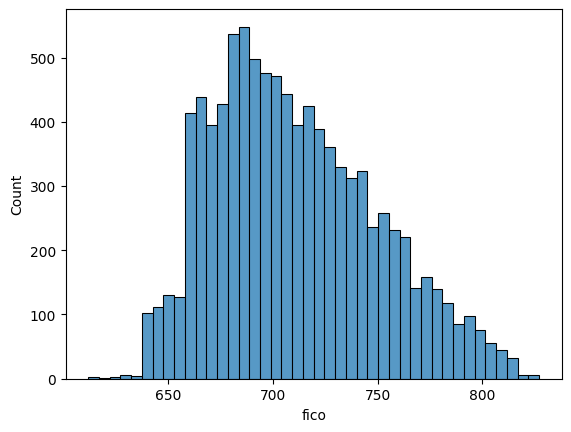

In [17]:
sns.histplot(df1['fico'])

### 1.5.2 CATEGORICAL ATTRIBUTES

In [20]:
cat_attributes.apply(lambda x: x.unique().shape[0])

purpose    7
dtype: int64

# 2.0 FEATURES ENGINEERING

In [22]:
df2 = df1.copy()

# 3.0 FEATURES SELECTION

In [23]:
df3 = df2.copy()

# 4.0 EXPLORATORY DATA ANALYSIS - E.D.A

In [24]:
df4 = df3.copy()

## 4.1 CREDIT POLICY

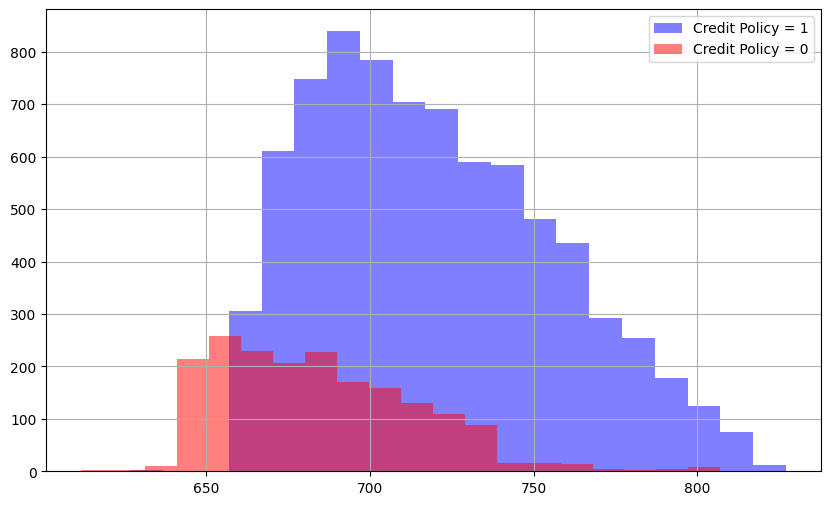

In [26]:
plt.figure(figsize=(10,6))
df4[df4['credit_policy'] == 1]['fico'].hist(bins=20, color='blue', alpha=0.5, label='Credit Policy = 1')
df4[df4['credit_policy'] == 0]['fico'].hist(bins=20, color='red', alpha=0.5, label='Credit Policy = 0')

plt.legend()

## 4.2 NOT FULLY PAID

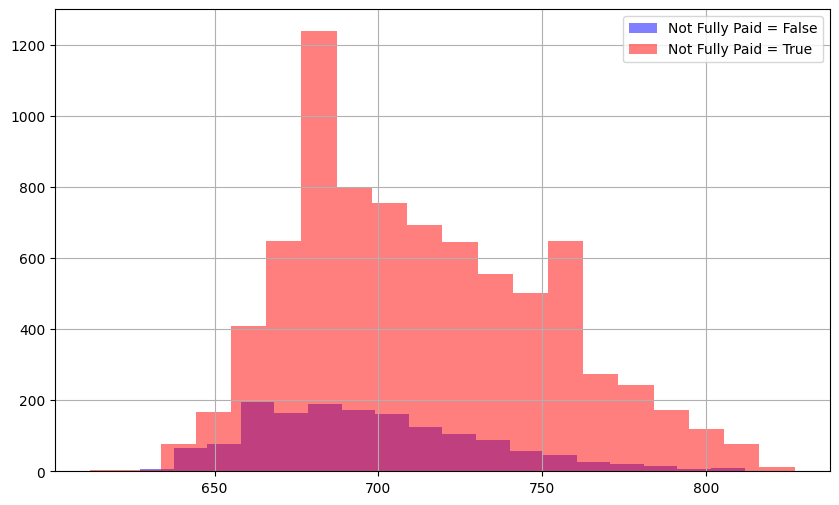

In [28]:
plt.figure(figsize=(10,6))
df4[df4['not_fully_paid'] == 1]['fico'].hist(bins=20, color='blue', alpha=0.5, label='Not Fully Paid = False')
df4[df4['not_fully_paid'] == 0]['fico'].hist(bins=20, color='red', alpha=0.5, label='Not Fully Paid = True')

plt.legend()

## 4.3 PURPOSE

<Axes: xlabel='purpose', ylabel='count'>

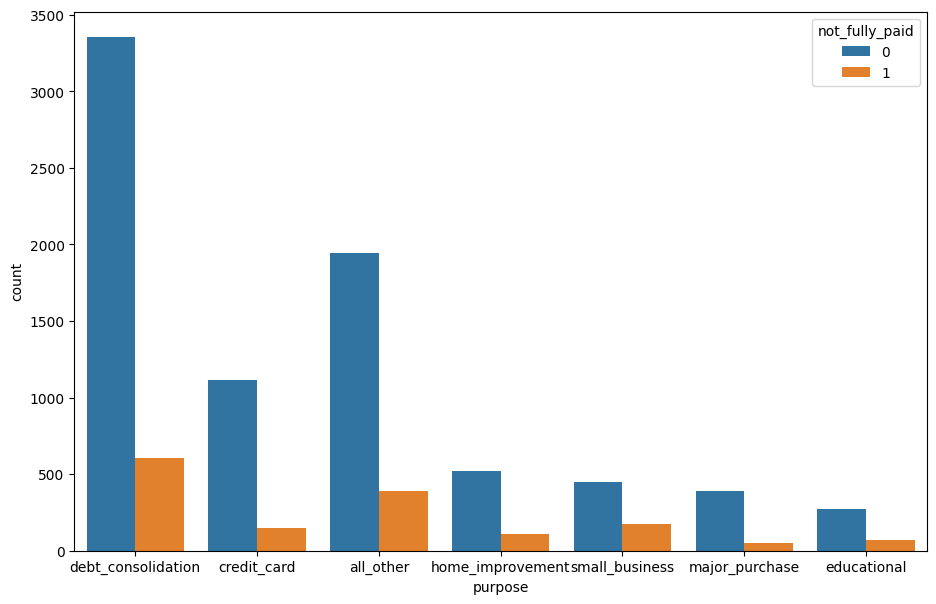

In [29]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose', data=df4, hue='not_fully_paid')


## 4.4 FICO

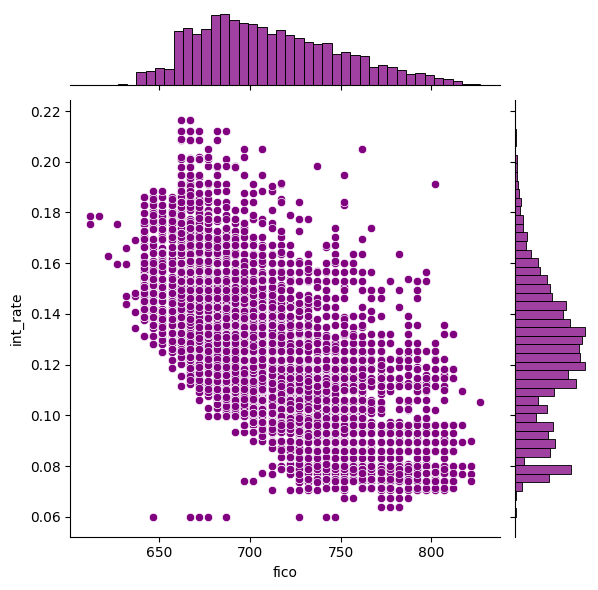

In [30]:
sns.jointplot(x='fico', y='int_rate', data=df4, color='purple')

## 4.5 FICO TENDENCY

<Figure size 1000x600 with 0 Axes>

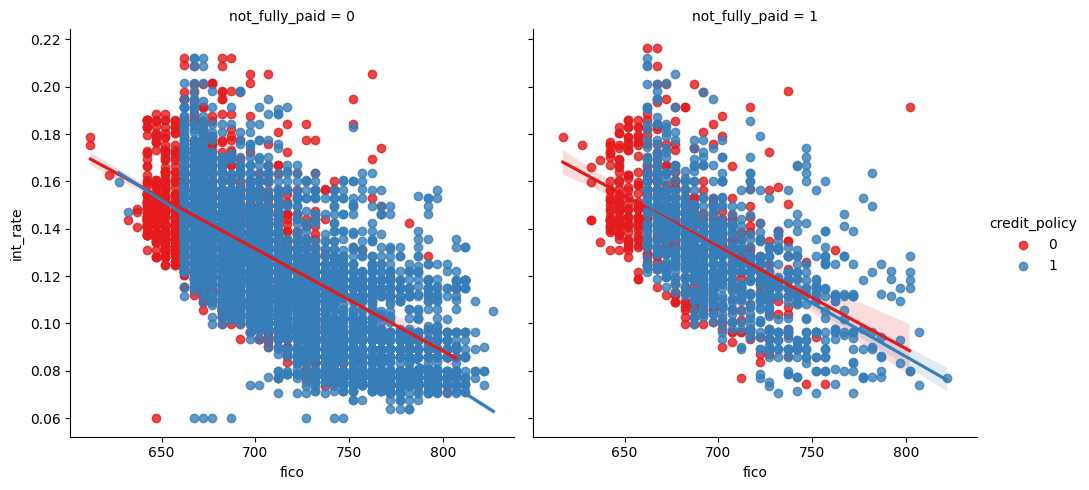

In [31]:
plt.figure(figsize=(10,6))
sns.lmplot(x='fico', y='int_rate', data=df4, hue='credit_policy', col='not_fully_paid', palette='Set1')

# 5.0 DATA PREPARATION

In [32]:
df5 = df4.copy()

## 5.1 TRANSFORMATIONS

In [37]:
cat_features = ['purpose']

In [38]:
df_final = pd.get_dummies(df5, columns=cat_features, drop_first=True)

## 5.2 DECISION TREE MODEL

In [41]:
X = df_final.drop('not_fully_paid', axis=1)
y = df_final['not_fully_paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
predictions = dtree.predict(X_test)

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [47]:
print(confusion_matrix(y_test, predictions))

[[1992  439]
 [ 342  101]]


## 5.3 RANDOM FOREST CLASSIFIER

In [49]:
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [50]:
predictions = rfc.predict(X_test)

In [51]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.47      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



In [52]:
print(confusion_matrix(y_test, predictions))

[[2421   10]
 [ 434    9]]
